# Jupyter Notebook for BigQuery

In [1]:
import os
import google.cloud.bigquery
import pandas as pd

# define the project and database
PROJECT = os.getenv('GOOGLE_PROJECT_NAME')
DATASET = 'mta_data'

An error occurred: module 'importlib.metadata' has no attribute 'packages_distributions'


/home/ozkary/.local/share/virtualenvs/de-mta-8Vm7nBsw/lib/python3.9/site-packages/google/api_core/_python_version_support.py:252: FutureWarning: You are using a Python version (3.9.5) past its end of life. Google will update google.api_core with critical bug fixes on a best-effort basis, but not with any other fixes or features. Please upgrade to the latest Python version, or at least Python 3.10, and then update google.api_core.
  warnings.warn(message, FutureWarning)


### Set the API client and project information

In [2]:
# using the bigquery client library 
client = google.cloud.bigquery.Client()

# set a reference to the database
dataset_ref = client.dataset(DATASET, project=PROJECT)

# define a run query function
def run_query(sql):
    query = client.query(sql)
    return query.to_dataframe()
    

### View the data that is available on the datalake by querying the external table.

In [3]:
# list the records from the external table (from the data lake)
sql = """
SELECT CA,UNIT,STATION,LINENAME,DIVISION,DATE,TIME,`DESC`,ENTRIES,EXITS 
FROM `{}.{}.ext_turnstile`  
limit 100
""".format(PROJECT, DATASET)
# query the data using the client reference
df = run_query(sql)
print(sql)
df.head(15)


/home/ozkary/.local/share/virtualenvs/de-mta-8Vm7nBsw/lib/python3.9/site-packages/google/cloud/bigquery/table.py:1994: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(



SELECT CA,UNIT,STATION,LINENAME,DIVISION,DATE,TIME,`DESC`,ENTRIES,EXITS 
FROM `ozkary-de-101.mta_data.ext_turnstile`  
limit 100



CA  UNIT STATION LINENAME DIVISION        DATE      TIME     DESC  \
0   A002  R051   59 ST  NQR456W      BMT  2024-01-13  03:00:00  REGULAR   
1   A002  R051   59 ST  NQR456W      BMT  2024-01-13  07:00:00  REGULAR   
2   A002  R051   59 ST  NQR456W      BMT  2024-01-13  11:00:00  REGULAR   
3   A002  R051   59 ST  NQR456W      BMT  2024-01-13  15:00:00  REGULAR   
4   A002  R051   59 ST  NQR456W      BMT  2024-01-13  19:00:00  REGULAR   
5   A002  R051   59 ST  NQR456W      BMT  2024-01-13  23:00:00  REGULAR   
6   A002  R051   59 ST  NQR456W      BMT  2024-01-14  03:00:00  REGULAR   
7   A002  R051   59 ST  NQR456W      BMT  2024-01-14  07:00:00  REGULAR   
8   A002  R051   59 ST  NQR456W      BMT  2024-01-14  11:00:00  REGULAR   
9   A002  R051   59 ST  NQR456W      BMT  2024-01-14  15:00:00  REGULAR   
10  A002  R051   59 ST  NQR456W      BMT  2024-01-14  19:00:00  REGULAR   
11  A002  R051   59 ST  NQR456W      BMT  2024-01-14  23:00:00  REGULAR   
12  A002  R051   59 ST  NQR456W      BMT  2024-01-15  03:00:00  REGULAR   
13  A002  R051   59 ST  NQR456W      BMT  2024-01-15  07:00:00  REGULAR   
14  A002  R051   59 ST  NQR456W      BMT  2024-01-15  11:00:00  REGULAR   

    ENTRIES  EXITS  
0    108542  78844  
1    108547  78858  
2    108579  78908  
3    108649  78964  
4    108732  79019  
5    108792  79043  
6    108800  79064  
7    108801  79077  
8    108824  79109  
9    108866  79147  
10   108926  79193  
11   108962  79227  
12   108965  79234  
13   108970  79262  
14   109008  79391

In [4]:
# get the last date processed
sql = """
SELECT MAX(DATE) as LAST_DATE 
FROM `{}.{}.ext_turnstile`
WHERE station NOT LIKE '%Test%'
""".format(PROJECT, DATASET)
# query the data using the client reference
df = run_query(sql)
print(sql)
df.head(50)


SELECT MAX(DATE) as LAST_DATE 
FROM `ozkary-de-101.mta_data.ext_turnstile`
WHERE station NOT LIKE '%Test%'



/home/ozkary/.local/share/virtualenvs/de-mta-8Vm7nBsw/lib/python3.9/site-packages/google/cloud/bigquery/table.py:1994: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


LAST_DATE
0  2024-01-26

### List the database objects

In [6]:
# using the bigquery client library read a list of tables 
tables = list(client.list_tables(dataset_ref))
for table in tables:
    print(table.table_id)

dim_booth
dim_date
dim_station
ext_batch_turnstile
ext_streaming_turnstile
ext_turnstile
fact_stats
fact_turnstile
remote_booth_station
rpt_turnstile
stg_booth
stg_date
stg_station
stg_turnstile


In [7]:
# get the tables in the system and for each table get the schema
# and print the table name and row count
# for table in tables:
#     table_ref = dataset_ref.table(table.table_id)
#     table = client.get_table(table_ref)
#     print(table.schema)

# for each table get the row count
for table in tables:
    table_ref = dataset_ref.table(table.table_id)
    table = client.get_table(table_ref)
    print(table.table_id, table.num_rows)

dim_booth 801
dim_date 5480
dim_station 586
ext_batch_turnstile 0
ext_streaming_turnstile 0
ext_turnstile 0
fact_stats 3
fact_turnstile 5301035
remote_booth_station 768
rpt_turnstile 0
stg_booth 0
stg_date 0
stg_station 0
stg_turnstile 0


### Look at the station information


In [9]:
# read the station information
sql = """
SELECT station_id, station_name
FROM `{}.{}.dim_station`
limit 100
""".format(PROJECT, DATASET)
# query the data using the client reference
df = run_query(sql)
print(sql)
df.head()


SELECT station_id, station_name
FROM `ozkary-de-101.mta_data.dim_station`
limit 100



station_id     station_name
0  9440f03bc95426dfed0df95d0768ebd2      BEACH 36 ST
1  2e022c4b53de34527d1a8eb5ec5f234b  MYRTLE-WILLOUGH
2  1637671c86de22714149d58244698394       LACKAWANNA
3  46d6cde2d4010f5a20dd0b3dcd8d86d7   W 4 ST-WASH SQ
4  821cb20abd9ee7e5a1358100794c0878  CLINTON-WASH AV

In [13]:
# use sql to query the latest date in the fact_turnstile table and print the result using the client reference
sql = """
SELECT max(created_dt) as max_date
FROM `{}.{}.fact_turnstile`
""".format(PROJECT, DATASET)
# query the data using the client reference
df = run_query(sql)
print(sql)
df.head()


SELECT max(created_dt) as max_date
FROM `ozkary-de-101.mta_data.fact_turnstile`



max_date
0 2024-10-25 23:56:41+00:00

In [16]:
# read records from n days ago
from datetime import datetime, timedelta

# set a variable to the current date - n days
last_month = datetime.today() - timedelta(days=115)
date_value = last_month.strftime('%Y-%m-%d')

# select a limit of 100 rows with the latest date
sql = """
SELECT station_id, created_dt, entries, exits
FROM `{}.{}.fact_turnstile`
WHERE created_dt >= '{}'
LIMIT 100
""".format(PROJECT, DATASET, date_value)    
print(sql)
df = run_query(sql)
df.head()


SELECT station_id, created_dt, entries, exits
FROM `ozkary-de-101.mta_data.fact_turnstile`
WHERE created_dt >= '2024-08-02'
LIMIT 100



station_id                created_dt  entries  \
0  77792700f8184bbf78ed91567285bd1d 2024-10-06 20:00:00+00:00  7204370   
1  77792700f8184bbf78ed91567285bd1d 2024-10-06 00:00:00+00:00  7204213   
2  77792700f8184bbf78ed91567285bd1d 2024-10-06 16:00:00+00:00  7204339   
3  77792700f8184bbf78ed91567285bd1d 2024-10-06 08:00:00+00:00  7204229   
4  77792700f8184bbf78ed91567285bd1d 2024-10-06 12:00:00+00:00  7204287   

      exits  
0  13114094  
1  13113787  
2  13113952  
3  13113840  
4  13113882

In [19]:
# join the fact_turnstile table with the dim_station table and dim_booth table for the last three months

sql = """
SELECT station_name, booth_name, created_dt, entries, exits
FROM `{}.{}.fact_turnstile` as f
JOIN `{}.{}.dim_station` as s
ON f.station_id = s.station_id
JOIN `{}.{}.dim_booth` as b
ON f.booth_id = b.booth_id
WHERE created_dt >= '{}'
LIMIT 1000
""".format(PROJECT, DATASET, PROJECT, DATASET, PROJECT, DATASET, date_value)
df_station = run_query(sql)
print(sql)
print_df(df_station)




SELECT station_name, booth_name, created_dt, entries, exits
FROM `ozkary-de-101.mta_data.fact_turnstile` as f
JOIN `ozkary-de-101.mta_data.dim_station` as s
ON f.station_id = s.station_id
JOIN `ozkary-de-101.mta_data.dim_booth` as b
ON f.booth_id = b.booth_id
WHERE created_dt >= '2024-08-02'
LIMIT 1000



## Get the top n stations with the most entries using the df_station dataframe

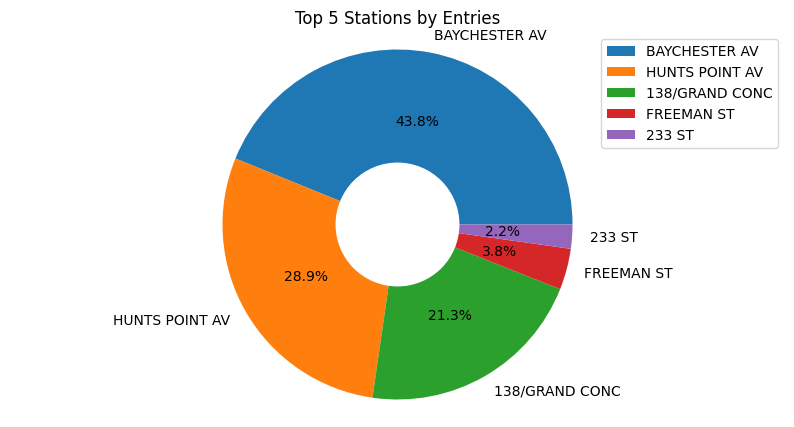

In [20]:

# get the top n stations with the most entries using the df_station dataframe
df_top_entries = df_station.groupby('station_name')['entries'].sum().reset_index().sort_values(by='entries', ascending=False).head(5)

# create a pie chart using the df_top_entries dataframe 
import matplotlib.pyplot as plt

# set the size of the pie chart
plt.figure(figsize=(10,5))

plt.pie(df_top_entries['entries'], labels=df_top_entries['station_name'], autopct='%1.1f%%')
plt.axis('equal')

# add a donut hole to the pie chart
my_circle=plt.Circle( (0,0), 0.35, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)


# add a title and legend to the pie chart
plt.title('Top 5 Stations by Entries')
plt.legend(df_top_entries['station_name'], loc='upper right')

plt.show()

